In [1]:
from scipy import *
from numpy import *
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt


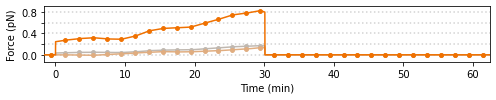

In [2]:
###########################
### 30 min pull-release

data=loadtxt('../data/2-trajectory_files/30min-PR/20200221_Pos4_cell0_.txt',delimiter='\t',skiprows=1)

tMagnetON  = 0                 # Put magnet at 18:25:38
tMagnetOFF = (55-25)*60+44-38  # Removed magnet at 18:55:44
Fx=lambda t: interp(t,data[:,0],data[:,1])*(tMagnetON<=t)*(t<tMagnetOFF)
Fy=lambda t: interp(t,data[:,0],data[:,2])*(tMagnetON<=t)*(t<tMagnetOFF)
Fz=lambda t: interp(t,data[:,0],data[:,3])*(tMagnetON<=t)*(t<tMagnetOFF)


fig=plt.figure(figsize=(7,1.5)); ax_=plt.gca()

t=r_[-5:65:1./60]*60
s=15
ax_.plot(   t/60,          Fx(t),         c='#e0ad80', zorder=2, label='$F_x$')
ax_.scatter(data[:,0]/60,  Fx(data[:,0]), c='#e0ad80', zorder=2, marker='o', s=s)
ax_.plot(   t/60,         -Fy(t),         c='#f07100', zorder=3, label='$F_y$')
ax_.scatter(data[:,0]/60, -Fy(data[:,0]), c='#f07100', zorder=3, marker='o', s=s)
ax_.plot(   t/60,         -Fz(t),         c='#c0b8b0', zorder=1, label='$F_z$')
ax_.scatter(data[:,0]/60, -Fz(data[:,0]), c='#c0b8b0', zorder=1, marker='o', s=s)

for y in [0,.2,.4,.6,.8]: ax_.axhline(y ,c='lightgray',zorder=0,ls=':')

ax_.set_xlim(data[2,0]/60-1,data[33,0]/60+1);
ax_.set_ylim(-.13,.9); plt.yticks([.0,.2,.4,.6,.8],labels=[.0,'',.4,'',.8])
ax_.set_xlabel('Time (min)');
ax_.set_ylabel('Force (pN)');

#plt.legend(ncol=3)
plt.tight_layout();
#plt.show();
plt.savefig('fig1_30min_force.pdf')


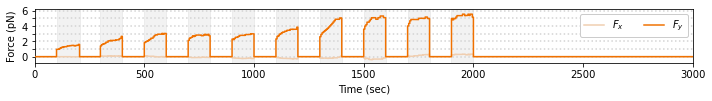

In [3]:
##############################
### 10x 100sec pull-releases

Fxyz=loadtxt("../data/2-trajectory_files/100s-PR/20200304_100s-PR_Fxyz.csv",skiprows=1,delimiter=';')

dt=5 # sec
delaySwitchMagnet=dt-1 # Delay in sec between placement/removal of magnet and acquisition of image

t=Fxyz[:,0]*dt+delaySwitchMagnet

# Frame number of each pull and each release
fPull   =where(diff((Fxyz[:,1]!=0)*1)==1)[0]+1
fRelease=where(diff((Fxyz[:,1]!=0)*1)==-1)[0]+1
tPull=fPull*dt; tRelease=fRelease*dt; 

fig=plt.figure(figsize=(10,1.5)); ax_=plt.gca()
ax_.step(t-delaySwitchMagnet+dt, Fxyz[:,1],c='#f0ceb0', zorder=2, label='$F_x$')
ax_.step(t-delaySwitchMagnet+dt,-Fxyz[:,2],c='#f07100', zorder=3, label='$F_y$')
#ax_.step(t-delaySwitchMagnet+dt, Fxyz[:,3],c='#d0c0c0', zorder=1, label='$F_z$')

ax_.set_ylabel("Force (pN)"); ax_.set_xlabel("Time (sec)");
ax_.set_xlim(0,3000); ax_.set_ylim(-.8,6.2); plt.yticks([0,1,2,3,4,5,6],labels=[0,'',2,'',4,'',6])

for y in [0,1,2,3,4,5,6]: ax_.axhline(y ,c='lightgray',zorder=0,ls=':')
for i in r_[:tPull.shape[0]]: ax_.axvspan(tPull[i],tRelease[i], zorder=0, alpha=.2, color='#c0c0c0')
ax_.legend(loc='upper right',framealpha=1,ncol=3);

plt.tight_layout();
#plt.show()
plt.savefig('fig1_100sec_force.pdf')
